In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
items = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
         'Sneaker', 'Bag', 'Ankle Boot']

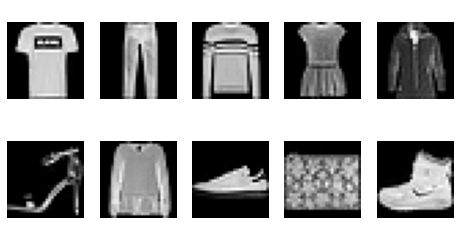

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_full[np.where(y_train_full == i)[0][0]], cmap='gray')
    plt.title(items[i], color='w')
    plt.axis(False)

plt.show()

In [3]:
X_train_full = X_train_full / 255.
X_test = X_test / 255.

In [4]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [5]:
from keras_preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1
)

In [6]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [7]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=7, padding="same", activation="relu",
                        input_shape=[28,28,1]),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         2

In [9]:
epochs = 15
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 37s 22ms/step - loss: 0.6082 - accuracy: 0.7675 - val_loss: 0.4200 - val_accuracy: 0.8426

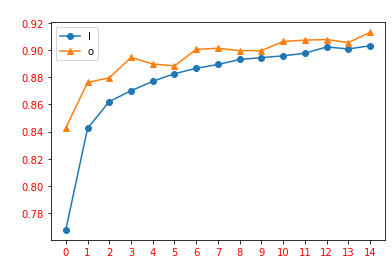

In [14]:
plt.plot(history.history['accuracy'], marker="o", label="training")
plt.plot(history.history['val_accuracy'], marker="^", label='validation')
plt.legend('lower right')
plt.xlabel('Number of Epochs', color='w')
plt.ylabel('Accuracy', color='w')
plt.title('Training accuracy over epochs', color='w')
plt.xticks(range(epochs))
[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2470 - accuracy: 0.9083

[0.2470467984676361, 0.90829998254776]